In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<ipython-input-4-b84a7e97f9a2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probabilities = df.groupby('DistanceGroup').apply(lambda group: sum(group['Attrition'] == 'Yes') / len(group)).reset_index()


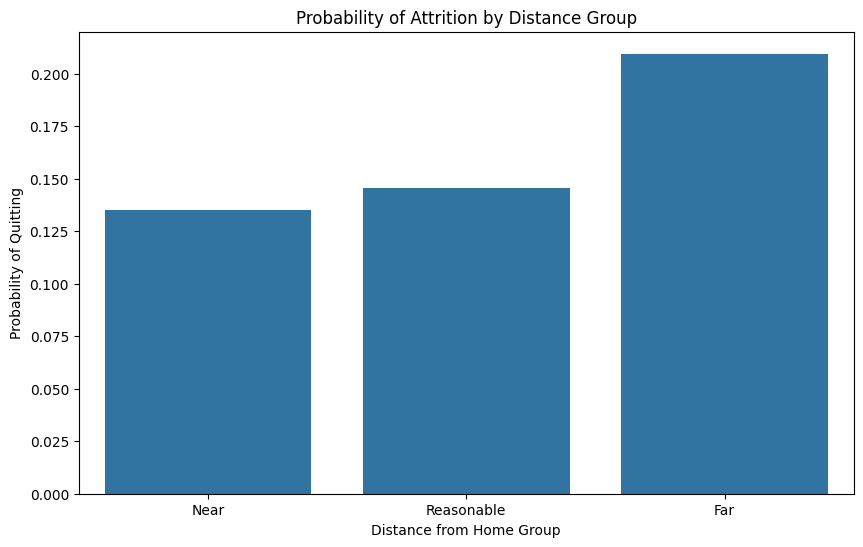

In [ ]:
cut_labels = ['Near', 'Reasonable', 'Far']
cut_bins = [-1, df['DistanceFromHome'].quantile(0.33), df['DistanceFromHome'].quantile(0.67), df['DistanceFromHome'].max() + 1]
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=cut_bins, labels=cut_labels)

probabilities = df.groupby('DistanceGroup').apply(lambda group: sum(group['Attrition'] == 'Yes') / len(group)).reset_index()
probabilities.columns = ['DistanceGroup', 'Probability']

plt.figure(figsize=(10, 6))
sns.barplot(x='DistanceGroup', y='Probability', data=probabilities, order=cut_labels)
plt.title('Probability of Attrition by Distance Group')
plt.ylabel('Probability of Quitting')
plt.xlabel('Distance from Home Group')
plt.show()

<ipython-input-5-ec8466483c97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='NumCompaniesWorked', x='Education', palette='Set3')


<Axes: xlabel='Education', ylabel='NumCompaniesWorked'>

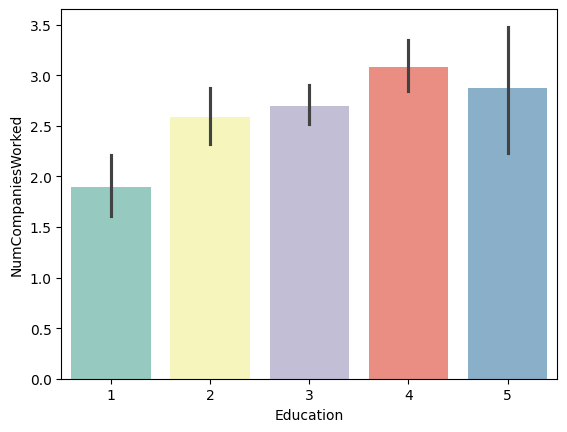

In [ ]:
sns.barplot(data=df, y='NumCompaniesWorked', x='Education', palette='Set3')

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

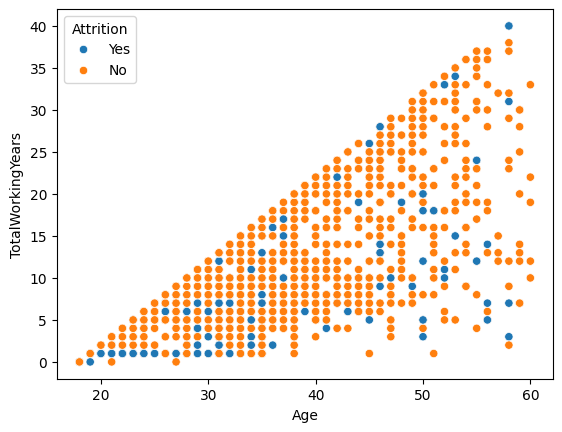

In [ ]:
sns.scatterplot(data=df, x='Age', y='TotalWorkingYears', hue='Attrition')